In [ ]:
# -*- coding: utf-8 -*-

########################################
#### データの準備

import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
### 各種定義

# x軸の定義範囲
x_max = 1
x_min = -1

# y軸の定義範囲
y_max = 2
y_min = -1

# スケール、１単位に何点を使うか
SCALE = 50

# train/testでTestデータの割合を指定
TEST_RATE = 0.3

In [ ]:
### データ生成

data_x = np.arange(x_min, x_max, 1 / float(SCALE)).reshape(-1, 1)  

data_ty = data_x * data_x  # ｘ**2 がノイズが乗る前の値
data_vy = data_ty.reshape(-1, 1) + np.random.randn(len(data_ty), 1) * 0.5  # ノイズを乗せる

In [ ]:
### 学習データ／テストデータに分割（分類問題、回帰問題で使用）

# 学習データ／テストデータの分割処理
def split_train_test(array):
    length = len(array)
    n_train = int(length * (1 - TEST_RATE))

    indices = list(range(length))
    np.random.shuffle(indices)
    idx_train = indices[:n_train]
    idx_test = indices[n_train:]

    return sorted(array[idx_train]), sorted(array[idx_test])

In [ ]:
# インデックスリストを分割
indices = np.arange(len(data_x))  # インデックス値のリスト
idx_train, idx_test = split_train_test(indices)

# 学習データ
x_train = data_x[idx_train]
y_train = data_vy[idx_train]

# テストデータ
x_test = data_x[idx_test]
y_test = data_vy[idx_test]

In [ ]:
### グラフ描画

# 分析対象点の散布図
plt.scatter(data_x, data_vy, label='target')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()

In [ ]:
########################################
#### 分類問題

### 分類ラベル作成

# クラスの閾値。原点からの半径
CLASS_RADIUS = 0.6

# 近い／遠いでクラス分け -- 近いと True, 遠いと False
labels = (np.square(data_x) + np.square(data_vy)) < CLASS_RADIUS**2

# 学習データ／テストデータに分割
label_train = labels[idx_train]  # 学習データ
label_test = labels[idx_test]  # テストデータ

In [ ]:
### グラフ描画



plt.scatter(x_train[label_train], y_train[label_train], marker='v', label='near train')
plt.scatter(x_train[label_train != True], y_train[label_train != True], marker='+', label='far train')

plt.scatter(x_test[label_test], y_test[label_test], marker='^', label='near test')
plt.scatter(x_test[label_test != True], y_test[label_test != True], marker='x', label='far test')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# クラスの分離円
circle  = plt.Circle((0,0), CLASS_RADIUS, alpha=0.1, label='near area')
ax = plt.gca()
ax.add_patch(circle)

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)  #X軸範囲設定
plt.ylim(y_min, y_max)  #Y軸範囲設定

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()

In [ ]:
### 学習

from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

data_train = np.c_[x_train, y_train]
data_test = np.c_[x_test, y_test]

In [ ]:
# SVMの分類器を作成、学習
classifier = svm.SVC(gamma=1)
classifier.fit(data_train, label_train.reshape(-1))

# Testデータで評価
pred_test = classifier.predict(data_test)

# Accuracyを表示
print('accuracy_score:\n', accuracy_score(label_test.reshape(-1), pred_test)) 

# 混同行列を表示
print('Confusion matrix:\n', confusion_matrix(label_test.reshape(-1), pred_test))

In [ ]:
########################################
#### 回帰問題

from sklearn import linear_model

In [ ]:
### 1 次式で回帰

# x 値
X1_TRAIN = x_train
X1_TEST  = x_test

In [ ]:
# 学習
model = linear_model.LinearRegression()
model.fit(X1_TRAIN, y_train)

In [ ]:
# グラフに描画
plt.plot(x_test, model.predict(X1_TEST), linestyle='-.', label='poly deg 1')

In [ ]:
### 2 次式で回帰

# x 値
X2_TRAIN = np.c_[x_train**2, x_train]
X2_TEST  = np.c_[x_test**2, x_test]

In [ ]:
# 学習
model = linear_model.LinearRegression()
model.fit(X2_TRAIN, y_train)

In [ ]:
# グラフに描画
plt.plot(x_test, model.predict(X2_TEST), linestyle='--', label='poly deg 2')

In [ ]:
### 9 次式で回帰

# x 値
X9_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                 x_train**4, x_train**3, x_train**2, x_train]
X9_TEST  = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
                 x_test**4, x_test**3, x_test**2, x_test]

In [ ]:
# 学習
model = linear_model.LinearRegression()
model.fit(X9_TRAIN, y_train)

In [ ]:
# グラフに描画
plt.plot(x_test, model.predict(X9_TEST), linestyle='-', label='poly deg 9')


### データの表示

plt.scatter(x_train, y_train, marker='v',label="train")
plt.scatter(x_test, y_test, marker='x',label="test")

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()

In [ ]:
########################################
#### クラスタリング

from sklearn import cluster

In [ ]:
# x, y データを結合
data = np.c_[data_x, data_vy]

In [ ]:
# 学習 → ３つのクラスタに分類
model = cluster.KMeans(n_clusters=3)
model.fit(data)

In [ ]:
# data の分類結果（0 ～ (n_clusters - 1) の番号が付けられている）
labels = model.labels_

In [ ]:
plt.scatter(data_x[labels == 0], data_vy[labels == 0], marker='v', label='cluster 0')
plt.scatter(data_x[labels == 1], data_vy[labels == 1], marker='x', label='cluster 1')
plt.scatter(data_x[labels == 2], data_vy[labels == 2], marker='o', label='cluster 2')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

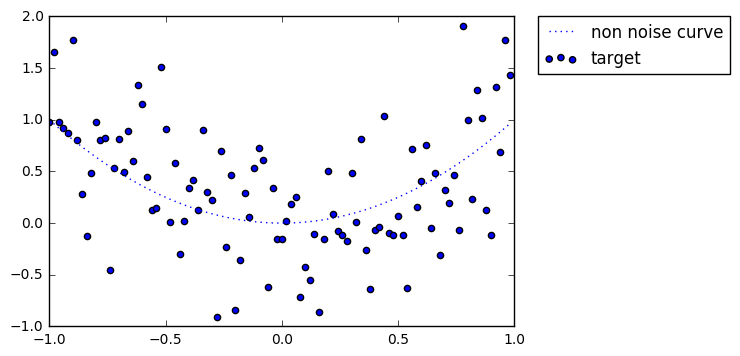

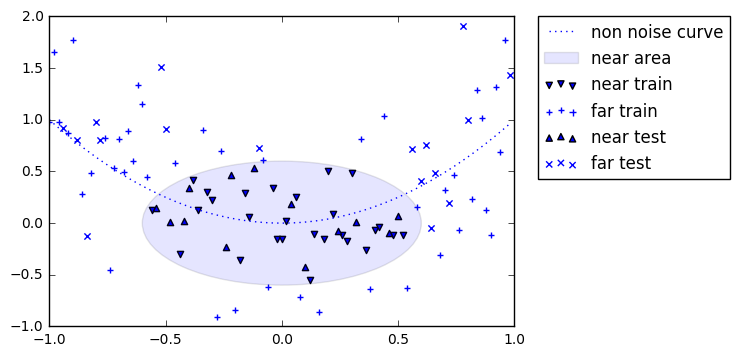

accuracy_score:
 1.0
Confusion matrix:
 [[17  0]
 [ 0 13]]


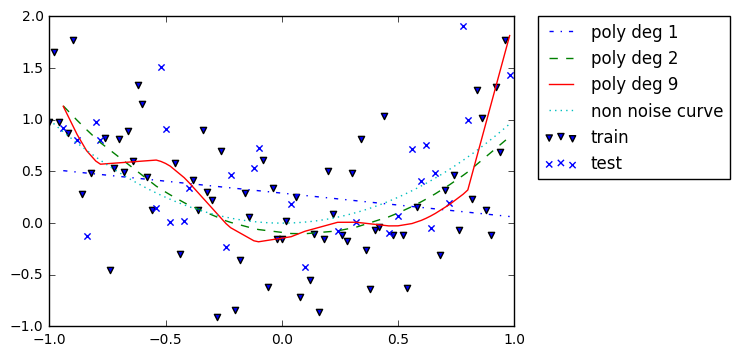

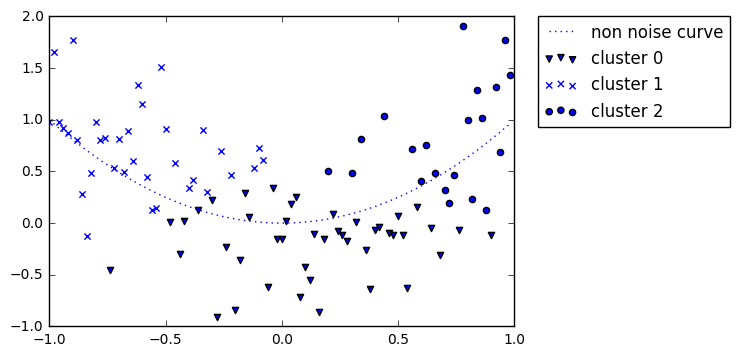

In [1]:
# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()